### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24


### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Κουστένης Χρίστος

Α.Μ.: el20227

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans

In [2]:
img = np.load('indian_pines_corrected.npy')

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):


In [3]:
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

In [4]:
labels = np.load('indian_pines_gt.npy')
labels.shape

(145, 145)

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών


In [5]:
height, width, channels = img.shape[:3]
print(f"Height: {height} pixels, Width: {width} pixels, Channels: {channels}")

Height: 145 pixels, Width: 145 pixels, Channels: 200




2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας


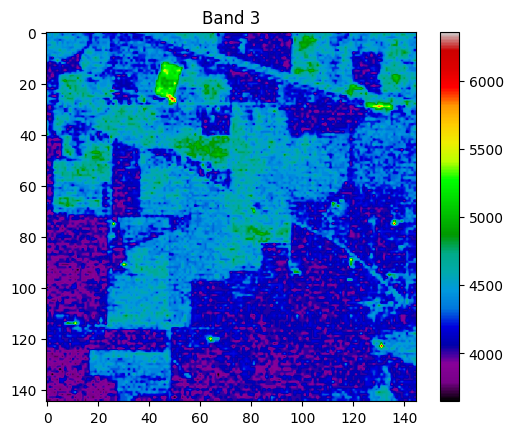

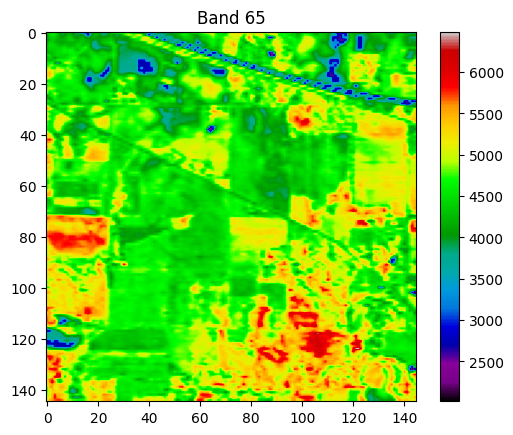

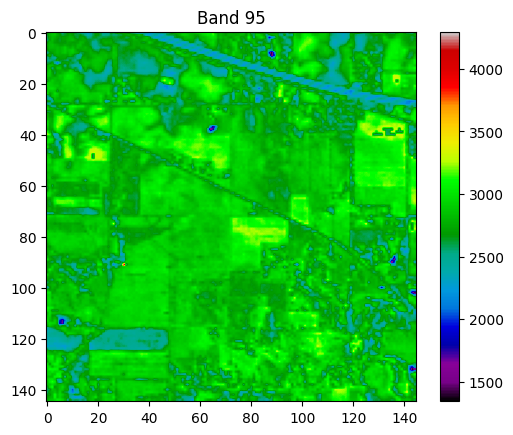

In [6]:
for i in (2, 64, 94):
    plt.figure()
    plt.imshow(img[:,:,i], cmap='nipy_spectral')
    plt.title("Band " + str(i+1))
    plt.colorbar()
    plt.show()




2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις


In [7]:
num_classes = len(np.unique(labels))
print("Number of different classes:", num_classes)

Number of different classes: 17



2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).


C:\Users\koust\AppData\Local\Temp\ipykernel_19704\870614876.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', len(classes))


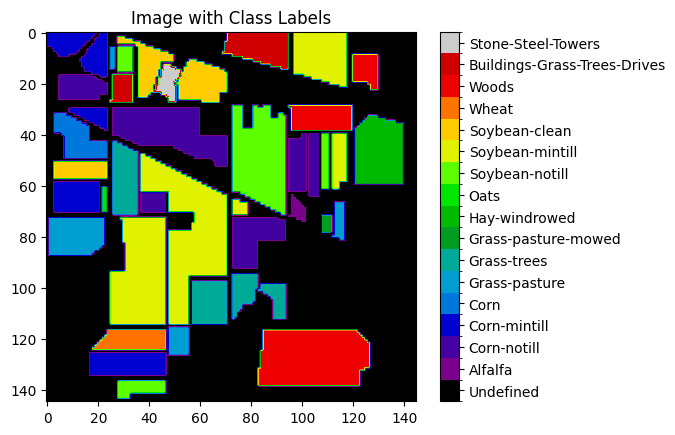

In [8]:
# Create a color map with as many colors as there are classes
cmap = plt.cm.get_cmap('nipy_spectral', len(classes))

# Create a normalization object that will map the class indices to the [0, 1] range
norm = mcolors.BoundaryNorm(np.arange(-0.5, len(classes), 1), len(classes))

# Plot the labels using the custom color map and normalization
image = plt.imshow(labels, cmap=cmap, norm=norm)

# Create a colorbar with the class names as labels
cbar = plt.colorbar(image, ticks=np.arange(len(classes)))
cbar.ax.set_yticklabels(classes)

# Add a title
plt.title("Image with Class Labels")

# Show the plot
plt.show()




2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [9]:
# Flatten the labels array and count the occurrences of each value
counts = np.bincount(labels.flatten())

# Print the number of pixels for each class
for i, class_name in enumerate(classes):
    print(f"{class_name}: {counts[i]} pixels")

Undefined: 10776 pixels
Alfalfa: 46 pixels
Corn-notill: 1428 pixels
Corn-mintill: 830 pixels
Corn: 237 pixels
Grass-pasture: 483 pixels
Grass-trees: 730 pixels
Grass-pasture-mowed: 28 pixels
Hay-windrowed: 478 pixels
Oats: 20 pixels
Soybean-notill: 972 pixels
Soybean-mintill: 2455 pixels
Soybean-clean: 593 pixels
Wheat: 205 pixels
Woods: 1265 pixels
Buildings-Grass-Trees-Drives: 386 pixels
Stone-Steel-Towers: 93 pixels


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [10]:
# `img` is a 3D array with shape (145, 145, 200)
# and `labels` is a 2D array with shape (145, 145)

# Convert the image to an N x K matrix
height, width, K = img.shape
image_reshaped = img.reshape((height * width, K))

# Convert the labels to a vector of length N
labels_reshaped = labels.flatten()

# Remove data marked as 'Undefined'
undefined_class_index = classes.index('Undefined')
mask = labels_reshaped != undefined_class_index

labels_reshaped_masked = labels_reshaped[mask]

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [11]:

# Επιλογή ενός τυχαίου pixel από κάθε κατηγορία
random_pixels = {}
for i, label in enumerate(classes):
    indices = []
    # Save all indices of class i in a list
    for j in range(len(labels_reshaped_masked)):
        if labels_reshaped_masked[j] == i:
            indices.append(j)
    if len(indices) == 0:
        continue
    
    # Choose a random index from the list
    random_pixels[label] = np.random.choice(indices)
# Τα τυχαία pixels βρίσκονται τώρα στη λίστα random_pixels

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

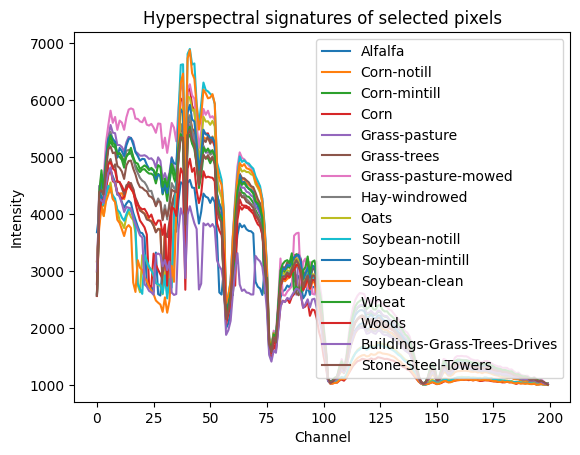

In [12]:
# Create a new figure
plt.figure()

# For each selected pixel, plot its hyperspectral signature
for class_name, pixel_num in random_pixels.items():
    # Get the hyperspectral signature of the pixel
    signature = image_reshaped[pixel_num]
    # Plot the signature
    plt.plot(signature, label=class_name)

# Add a legend
plt.legend()

# Add a title and labels
plt.title("Hyperspectral signatures of selected pixels")
plt.xlabel("Channel")
plt.ylabel("Intensity")

# Show the plot
plt.show()

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

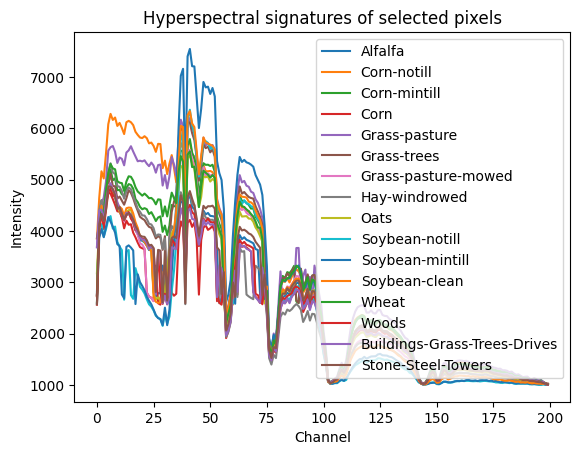

In [13]:

# Επιλογή ενός τυχαίου pixel από κάθε κατηγορία
random_pixels = {}
for i, label in enumerate(classes):
    indices = []
    for j in range(len(labels_reshaped_masked)):
        if labels_reshaped_masked[j] == i:
            indices.append(j)
    if len(indices) == 0:
        continue
    random_pixels[label] = np.random.choice(indices)
# Τα τυχαία pixels βρίσκονται τώρα στη λίστα random_pixels
    
# Create a new figure
plt.figure()

# For each selected pixel, plot its hyperspectral signature
for class_name, pixel_num in random_pixels.items():
    # Get the hyperspectral signature of the pixel
    signature = image_reshaped[pixel_num]
    # Plot the signature
    plt.plot(signature, label=class_name)

# Add a legend
plt.legend()

# Add a title and labels
plt.title("Hyperspectral signatures of selected pixels")
plt.xlabel("Channel")
plt.ylabel("Intensity")

# Show the plot
plt.show()


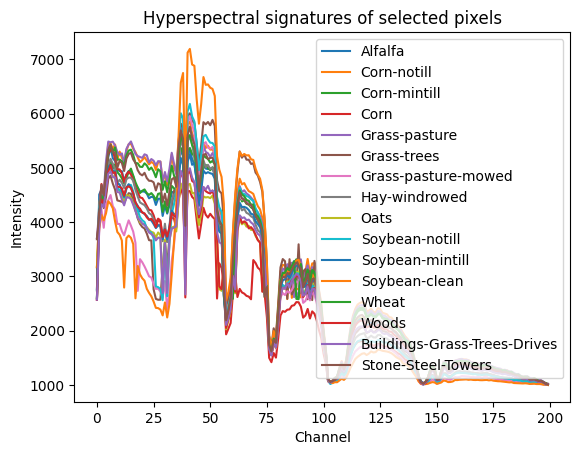

In [14]:

# Επιλογή ενός τυχαίου pixel από κάθε κατηγορία
random_pixels = {}
for i, label in enumerate(classes):
    indices = []
    for j in range(len(labels_reshaped_masked)):
        if labels_reshaped_masked[j] == i:
            indices.append(j)
    if len(indices) == 0:
        continue
    random_pixels[label] = np.random.choice(indices)
# Τα τυχαία pixels βρίσκονται τώρα στη λίστα random_pixels
    
# Create a new figure
plt.figure()

# For each selected pixel, plot its hyperspectral signature
for class_name, pixel_num in random_pixels.items():
    # Get the hyperspectral signature of the pixel
    signature = image_reshaped[pixel_num]
    # Plot the signature
    plt.plot(signature, label=class_name)

# Add a legend
plt.legend()

# Add a title and labels
plt.title("Hyperspectral signatures of selected pixels")
plt.xlabel("Channel")
plt.ylabel("Intensity")

# Show the plot
plt.show()

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

## Απάντηση

Παρατηρώ ότι στα κανάλια απο 75 μέχρι 100 ο διαχωρισμός των καλλιεργειών δεν είναι εύκολος ενώ στις περιοχές [0,25], [55,75] και 
[100,140] οι φασματικές υπογραφές διαφορετικών καλλειργειών έχουν πιο διακριτή γραφική. Επομένως σε μικρότερα κανάλια εξασφαλίζουν μεγαλύτερη ευκρίνεια μεταξύ υπογραφών διαφορετικών καλλιεργειών. Ωστόσο, επειδή για διαφορετικά pixel έχουμε διαφορετικα intensities για δεδομένη καλλιέργεια είναι δύσκολο να διακρίνουμε με βάση το signature ενός pixel σε τι καλλιέργεια ανήκει.

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

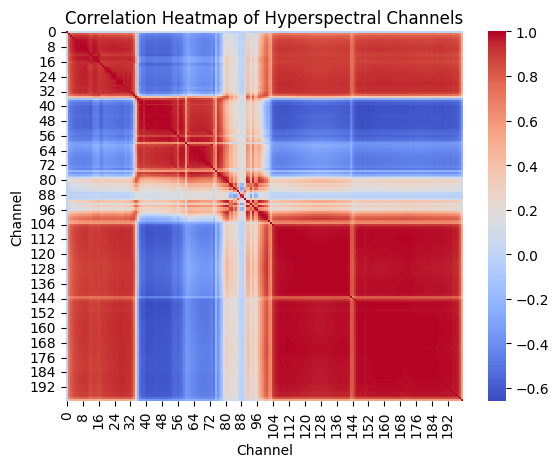

In [15]:
# Υποθέτουμε ότι έχετε τη λίστα random_pixels και image_reshaped
# Κάθε pixel είναι ένας πίνακας με K κανάλια

# Δημιουργία πίνακα συσχέτισης

correlation_matrix = pd.DataFrame(image_reshaped).corr()

# Σχεδιασμός του heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap of Hyperspectral Channels")
plt.xlabel("Channel")
plt.ylabel("Channel")
plt.show()



### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [16]:
X = image_reshaped[mask]
k = 16
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
print(X.shape)	
print(y_pred.shape)

(10249, 200)
(10249,)


4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [18]:
from munkres import Munkres

In [19]:
def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    print(uc1)
    print(uc2)  
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2) 
    assert(np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

In [20]:
from sklearn.metrics import rand_score, accuracy_score, confusion_matrix, silhouette_score
print("Rand score : ", rand_score(labels_reshaped_masked, y_pred))

Rand score :  0.8509086090461483


In [21]:
labels_reshaped_masked_2 = labels_reshaped_masked-1

In [22]:
y_pred_translated = translate_predicted_labels(y_pred, labels_reshaped_masked_2)
print("Accuracy score : ", accuracy_score(labels_reshaped_masked_2, y_pred_translated) )

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 14
map: 1 --> 15
map: 2 --> 9
map: 3 --> 4
map: 4 --> 12
map: 5 --> 3
map: 6 --> 7
map: 7 --> 11
map: 8 --> 8
map: 9 --> 5
map: 10 --> 1
map: 11 --> 10
map: 12 --> 6
map: 13 --> 13
map: 14 --> 2
map: 15 --> 0
Accuracy score :  0.34735096106937263


In [23]:
print("Silhouette score :", silhouette_score(X, y_pred_translated, metric='euclidean'))
print("Silhouette score :", silhouette_score(X, y_pred, metric='euclidean'))

Silhouette score : 0.2838124536963247
Silhouette score : 0.2838124536963247


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

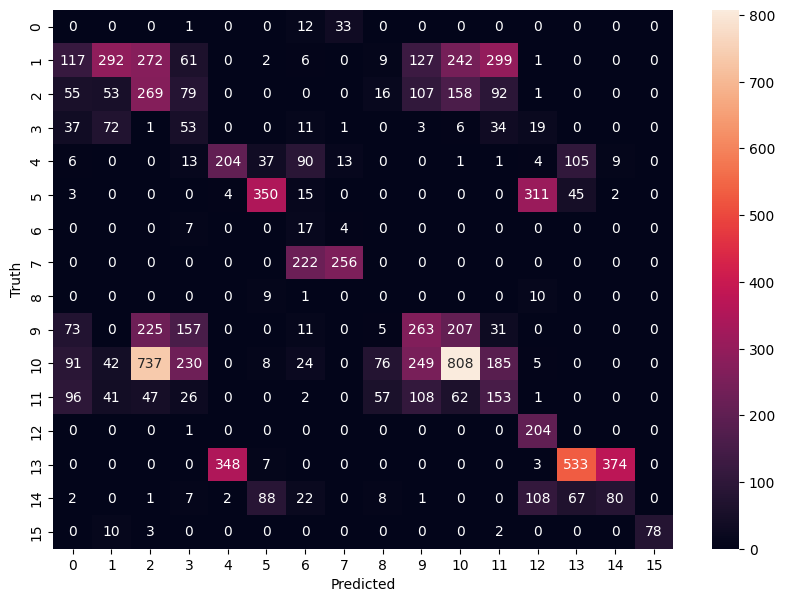

In [24]:
y_true = labels_reshaped_masked_2
y_pred = y_pred

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_translated)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

In [25]:

new_size = 21025
# Reshape y_pred into a 1D array with the new size filled with zeros
y_pred_reshaped = np.zeros(new_size, dtype=y_pred_translated.dtype)

# Update the positions indicated by the mask with the values from the original y_pred_2
y_pred_reshaped[mask] = y_pred_translated+1


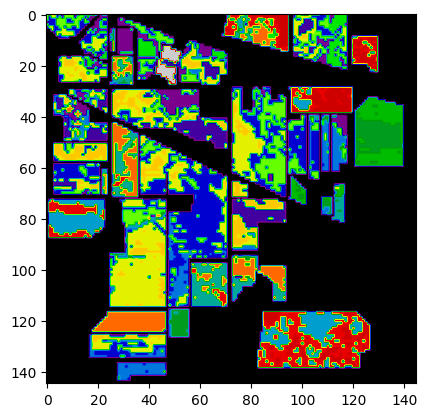

In [26]:
# Display the image
y_pred_image = y_pred_reshaped.reshape((height, width))

plt.imshow(y_pred_image, cmap='nipy_spectral')
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
img_reduced = pca.fit_transform(image_reshaped)

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [28]:
explained_variance_ratio = pca.explained_variance_ratio_
total_variance = sum(explained_variance_ratio)

print(f"The total variance in the dataset preserved by the first 3 principal components is {total_variance*100:.2f}%")

The total variance in the dataset preserved by the first 3 principal components is 93.52%


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [29]:
X_reduced = img_reduced[mask]
k = 16
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_reduced = kmeans.fit_predict(X_reduced)

C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
#Rand score
print("Rand score : ", rand_score(labels_reshaped_masked, y_pred_reduced))

#Accuracy score
y_pred_reduced_trans = translate_predicted_labels(y_pred_reduced, labels_reshaped_masked_2)
print("Accuracy score : ", accuracy_score(labels_reshaped_masked_2, y_pred_reduced_trans))

#Silhouette score
print("Silhouette score :", silhouette_score(X_reduced, y_pred_reduced_trans, metric='euclidean'))

Rand score :  0.8509980867499953
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 14
map: 1 --> 9
map: 2 --> 7
map: 3 --> 3
map: 4 --> 4
map: 5 --> 8
map: 6 --> 2
map: 7 --> 12
map: 8 --> 13
map: 9 --> 6
map: 10 --> 11
map: 11 --> 10
map: 12 --> 1
map: 13 --> 15
map: 14 --> 5
map: 15 --> 0
Accuracy score :  0.3432530002927115
Silhouette score : 0.3733727548794591


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 11
map: 1 --> 13
map: 2 --> 0
map: 3 --> 9
map: 4 --> 1
map: 5 --> 6
map: 6 --> 14
map: 7 --> 4
map: 8 --> 12
map: 9 --> 2
map: 10 --> 15
map: 11 --> 3
map: 12 --> 7
map: 13 --> 5
map: 14 --> 8
map: 15 --> 10


C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 12
map: 1 --> 0
map: 2 --> 13
map: 3 --> 9
map: 4 --> 15
map: 5 --> 11
map: 6 --> 5
map: 7 --> 3
map: 8 --> 1
map: 9 --> 14
map: 10 --> 8
map: 11 --> 10
map: 12 --> 6
map: 13 --> 4
map: 14 --> 2
map: 15 --> 7


C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 12
map: 1 --> 1
map: 2 --> 4
map: 3 --> 9
map: 4 --> 8
map: 5 --> 13
map: 6 --> 2
map: 7 --> 3
map: 8 --> 11
map: 9 --> 6
map: 10 --> 15
map: 11 --> 0
map: 12 --> 5
map: 13 --> 14
map: 14 --> 10
map: 15 --> 7


C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 11
map: 1 --> 13
map: 2 --> 3
map: 3 --> 5
map: 4 --> 12
map: 5 --> 10
map: 6 --> 0
map: 7 --> 1
map: 8 --> 4
map: 9 --> 7
map: 10 --> 2
map: 11 --> 9
map: 12 --> 8
map: 13 --> 15
map: 14 --> 6
map: 15 --> 14


C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 9
map: 1 --> 13
map: 2 --> 3
map: 3 --> 12
map: 4 --> 11
map: 5 --> 7
map: 6 --> 6
map: 7 --> 5
map: 8 --> 0
map: 9 --> 4
map: 10 --> 10
map: 11 --> 1
map: 12 --> 2
map: 13 --> 14
map: 14 --> 8
map: 15 --> 15


C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 14
map: 1 --> 2
map: 2 --> 6
map: 3 --> 13
map: 4 --> 7
map: 5 --> 1
map: 6 --> 12
map: 7 --> 9
map: 8 --> 11
map: 9 --> 4
map: 10 --> 3
map: 11 --> 5
map: 12 --> 10
map: 13 --> 15
map: 14 --> 0
map: 15 --> 8


C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 1
map: 5 --> 8
map: 6 --> 7
map: 7 --> 0
map: 8 --> 14
map: 9 --> 3
map: 10 --> 11
map: 11 --> 6
map: 12 --> 15
map: 13 --> 5
map: 14 --> 9
map: 15 --> 4


C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 6
map: 1 --> 9
map: 2 --> 4
map: 3 --> 1
map: 4 --> 0
map: 5 --> 10
map: 6 --> 14
map: 7 --> 5
map: 8 --> 15
map: 9 --> 12
map: 10 --> 2
map: 11 --> 11
map: 12 --> 13
map: 13 --> 8
map: 14 --> 3
map: 15 --> 7


C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 14
map: 1 --> 10
map: 2 --> 0
map: 3 --> 13
map: 4 --> 6
map: 5 --> 1
map: 6 --> 9
map: 7 --> 7
map: 8 --> 2
map: 9 --> 12
map: 10 --> 15
map: 11 --> 5
map: 12 --> 11
map: 13 --> 8
map: 14 --> 3
map: 15 --> 4


C:\Users\koust\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 6
map: 1 --> 2
map: 2 --> 14
map: 3 --> 1
map: 4 --> 0
map: 5 --> 7
map: 6 --> 9
map: 7 --> 4
map: 8 --> 5
map: 9 --> 11
map: 10 --> 15
map: 11 --> 3
map: 12 --> 12
map: 13 --> 8
map: 14 --> 10
map: 15 --> 13


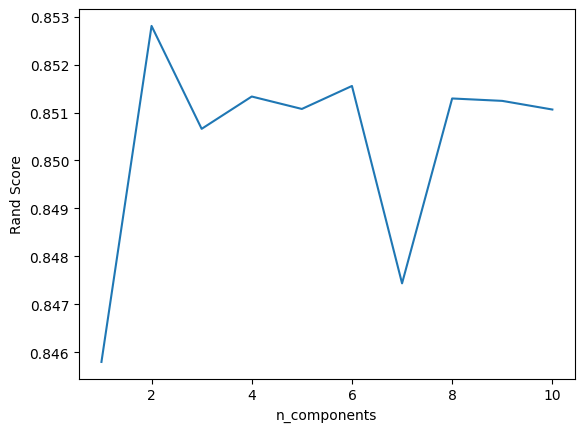

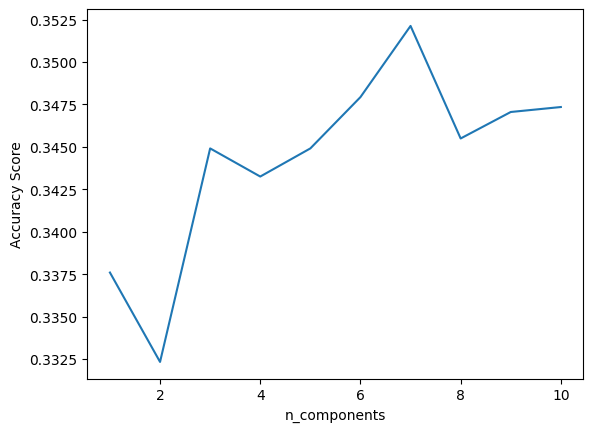

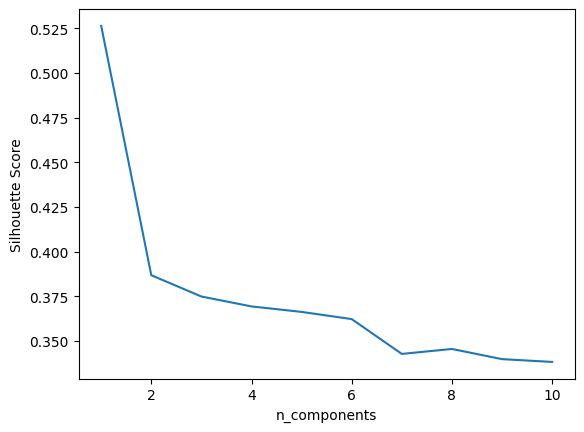

In [31]:
# Assuming X is your data
X = image_reshaped[mask]


rscores = []
sscores = []
ascores = []
for n in range(1, 11):
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X)
    
    kmeans = KMeans(n_clusters=16, random_state=42)
    y_pred_reduced = kmeans.fit_predict(X_reduced)

    #labels_reshaped_masked_2 (-1)   
    rscore = rand_score(labels_reshaped_masked, y_pred_reduced)

    y_pred_reduced_trans = translate_predicted_labels(y_pred_reduced, labels_reshaped_masked_2)
    ascore = accuracy_score(labels_reshaped_masked_2, y_pred_reduced_trans)

    sscore = silhouette_score(X_reduced, y_pred_reduced, metric='euclidean')

    rscores.append(rscore)
    ascores.append(ascore)
    sscores.append(sscore)

plt.plot(range(1, 11), rscores)
plt.xlabel('n_components')
plt.ylabel('Rand Score')
plt.show()

plt.plot(range(1, 11), ascores)
plt.xlabel('n_components')
plt.ylabel('Accuracy Score')
plt.show()

plt.plot(range(1, 11), sscores)
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')
plt.show()

## Απάντηση

Διαφορετικό πλήθος n_components οδηγεί σε μεταβολές της τάξης του 2% αρα αμελητέeς σε accuracy και rand score. Όσον αφορά το silhouette score παρατηρούμε σταθερή μείωση με αύξηση του dimension κάτι που είναι λογικό αφού με περισσότερες διαστάσεις υπάρχει ο κίνδυνος θορύβου ή και ovefitting που επηρεάζουν το clustering. Γενικά, το silhouette score δείχνει πόσο διακριτά είναι μεταξύ τους τα διαφορετικά clusters που κατασκευάζει το μοντέλο μη επιβλεπόμενης μάθησης.